# spliceformats

> A set of tools for parser and working with the results of differential splicing analyses, e.g. for MATS output. 

## Install

`spliceformats` relies on both Python and R dependencies. Namely, rpy2 must must installed and the `ashr` package must be installed on the version of R that rpy2 accesses. Rather than manually install all of the dependencies, the simplest way to install `spliceformats` is to first install the a conda enviroment that meets the package requirements, and then install `spliceformats` in that environment using pip. 

First, use the `spliceformats.yaml` file provided in the repository to create a new conda environment:
```
$ conda env create -f spliceformats.yaml -n spliceformats
```

If instead you wish to install the dependencies in an existing environment (named, for example, `my_env`), instead run

```
$ conda env update -n my_env -f spliceformats.yaml 
```

Once the environment is installed/updated, activate the environment (replace `env_name` with the enviroment's name):

```
$ conda activate env_name
```

Then we can install install `spliceformats`. Move into the downloaded `spliceformats` directory, and while in that directory run:

```
$ pip install -e .
```

The period `.` indicates the pip should treat the current directory as the Python package to install. The argument `-e` specifies that the installation should be editable--if the contents of the ./spliceformats directory changes, so does the installed the library.  

The provided conda environment includes jupyter and jupyter lab, so jupyter notebooks that can access the library can be opened using

```
$ jupyter lab
```

## Experimental modules

There are additional modules for working directly with `alignments` and representing `annotations` as `TranscriptomeGraphs`, but these are still experimental and should be used with caution.

## How to use

In [ ]:
from matplotlib import pyplot
import numpy
import scipy
import seaborn



In [ ]:
#hide
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6, 6]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

### Working with rMATS outputs

The `read_rmats` function can be used to load the output of an rMATS analysis. It can be used to load a single rMATS file:

In [ ]:
from spliceformats.readMATS import read_rmats
data=read_rmats('00_data/SE.MATS.JunctionCountOnly.txt')


Or all of the rMATS tables stored in a tar archive:

In [ ]:
data=read_rmats('00_data/ENCFF602CHO.tar.gz')

Each of the different classes of splicing events (SE, MXE, A5SS, A3SS, RI) as stored in `rmatsEvent` classes, which are grouped together in an `rmatsResult` object.

In [ ]:
print(type(data))
print (type(data.SE))

<class 'spliceformats.readMATS.rmatsResults'>
<class 'spliceformats.readMATS.rmatsEvents'>


All of the information about a particular class of splicing event can be accessed in the 

.SE

.A3SS

.A5SS

.MXE

.RI

attributes of the rmatsResults class.

For the example the entire rMATS table is stored as a dataframe, `.df`:


In [ ]:
data.SE.df

ID              GeneID geneSymbol    chr strand  exonStart_0base  \
0      12823  ENSG00000131504.11     DIAPH1   chr5      -        140967790   
1       1579   ENSG00000122591.7    FAM126A   chr7      -         22986570   
2      16290  ENSG00000085733.11       CTTN  chr11      +         70267575   
3      16299  ENSG00000085733.11       CTTN  chr11      +         70267575   
4      19274   ENSG00000111206.8      FOXM1  chr12      -          2974520   
...      ...                 ...        ...    ...    ...              ...   
32818   9990   ENSG00000083857.9       FAT1   chr4      -        187518187   
32819   9991   ENSG00000083857.9       FAT1   chr4      -        187521051   
32820   9992   ENSG00000083857.9       FAT1   chr4      -        187516294   
32821   9998  ENSG00000149548.10     CCDC15  chr11      +        124862475   
32822   9999  ENSG00000149548.10     CCDC15  chr11      +        124873773   

         exonEnd  upstreamES  upstreamEE  downstreamES  ...  SJC_SAMPLE_1  \
0      140967817   140966608   140966764     140998364  ...         74,29   
1       22986866    22980887    22985782      22999874  ...         26,57   
2       70267642    70266328    70266616      70269045  ...       152,150   
3       70267686    70266505    70266616      70269045  ...       152,150   
4        2974565     2973848     2973918       2975558  ...       399,520   
...          ...         ...         ...           ...  ...           ...   
32818  187518325   187516842   187516980     187518835  ...           3,0   
32819  187521514   187519125   187519279     187522422  ...           2,0   
32820  187516345   187510225   187510374     187516842  ...       214,243   
32821  124862583   124861356   124861479     124863064  ...           0,0   
32822  124873855   124863064   124863139     124875004  ...           0,1   

       IJC_SAMPLE_2 SJC_SAMPLE_2 IncFormLen SkipFormLen    PValue  FDR  \
0             40,24          3,6        126         100  0.000000  0.0   
1             51,59        16,18        199         100  0.000000  0.0   
2            78,128        20,43        166         100  0.000000  0.0   
3           342,422        20,43        199         100  0.000000  0.0   
4           159,295      187,301        144         100  0.000000  0.0   
...             ...          ...        ...         ...       ...  ...   
32818       412,332          0,0        199         100  1.000000  1.0   
32819       208,151          0,0        199         100  0.847889  1.0   
32820           0,0      154,273        150         100  0.837385  1.0   
32821          13,4          0,2        199         100  1.000000  1.0   
32822         49,65          2,2        181         100  0.742343  1.0   

         IncLevel1    IncLevel2  IncLevelDifference  
0         0.07,0.0   0.914,0.76              -0.802  
1      0.019,0.058  0.616,0.622              -0.581  
2      0.278,0.241  0.701,0.642              -0.412  
3      0.604,0.524  0.896,0.831              -0.299  
4       0.07,0.082  0.371,0.405              -0.312  
...            ...          ...                 ...  
32818    0.992,1.0      1.0,1.0              -0.004  
32819    0.988,1.0      1.0,1.0              -0.006  
32820    0.018,0.0      0.0,0.0               0.009  
32821      1.0,1.0    1.0,0.501               0.250  
32822    1.0,0.956  0.931,0.947               0.039  

[32823 rows x 23 columns]

The PSI values for each exon in sample 1 and sample 2 can be accessed in the `.psi1` and `.psi2` attributes.

Text(0, 0.5, 'KD PSI (psi)')

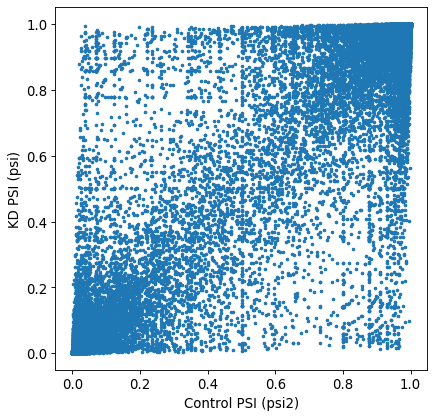

In [ ]:
pyplot.scatter(data.SE.psi2, data.SE.psi1, s=5)
pyplot.xlabel('Control PSI (psi2)')
pyplot.ylabel('KD PSI (psi)')

Note that by default a pseudocount correction is applied to the PSI estimates (+1 is added to the IJC and SJC read counts) by calling the `estimate_PSI` functiom. This reflects that observing zero inclusion junctions reads is not evidence that PSI truly equals zero. The unadjusted estimates can still be accessed in the `.orig` attribute, which stores an `rmatsEvents` object with the uncorrected data

Text(0.5, 1.0, 'No pseudocount correction')

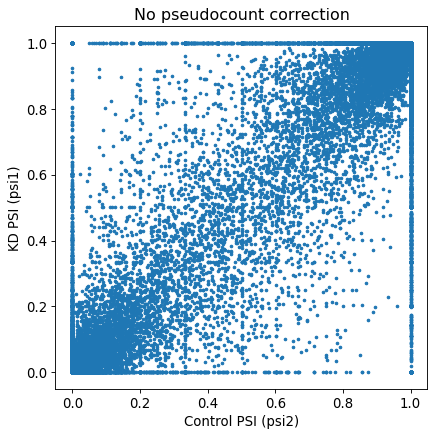

In [ ]:
pyplot.scatter(data.SE.orig.psi2, data.SE.orig.psi1, s=5)
pyplot.xlabel('Control PSI (psi2)')
pyplot.ylabel('KD PSI (psi1)')
pyplot.title("No pseudocount correction")

Even with the pseudocounts, these corrected estimates of PSI include noise from variation in the readcounts. Another way to visualize this problem is by plotting the original rMATS deltaPSI against the the total read counts:



Text(0.5, 0, 'Average IJC + SJC (log10)')

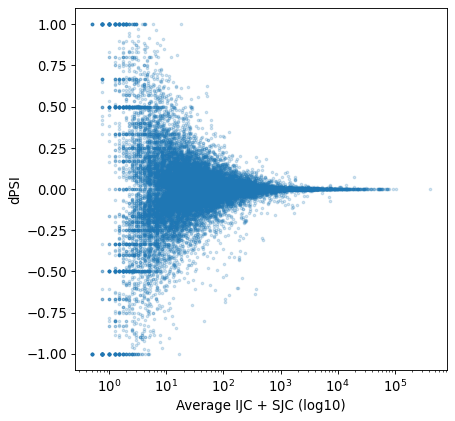

In [ ]:
sig=data.SE.fdr<.1
pyplot.scatter(data.SE.orig.totalreads, data.SE.orig.dpsi, s=5, alpha=.2)
pyplot.xscale('log')
pyplot.ylabel('dPSI')
pyplot.xlabel('Average IJC + SJC (log10)')

It's worth noting that applying pseudocounts (as `spliceformats` does by default) partially resolves this issue, shrinking dPSI a bit toward zero when the read counts are low:


Text(0.5, 0, 'Average IJC + SJC (log10)')

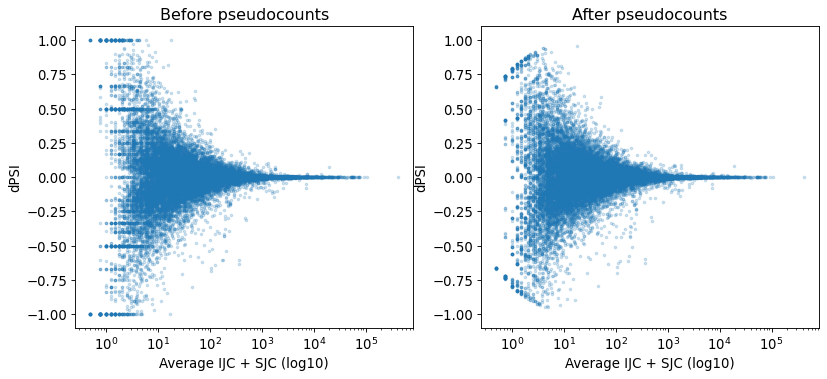

In [ ]:
pyplot.figure(figsize=(12,5))
ax=pyplot.subplot(121,)
pyplot.title('Before pseudocounts')
pyplot.scatter(data.SE.orig.totalreads, data.SE.orig.dpsi, s=5, alpha=.2,)
pyplot.xscale('log')
pyplot.ylabel('dPSI')
pyplot.xlabel('Average IJC + SJC (log10)')
pyplot.subplot(122,sharey=ax)
pyplot.title('After pseudocounts')
pyplot.scatter(data.SE.totalreads, data.SE.dpsi, s=5,alpha=.2)
pyplot.xscale('log')
pyplot.ylabel('dPSI')
pyplot.xlabel('Average IJC + SJC (log10)')

We can get a cleaner picture of the relationship between $\Psi_1$ and PSI2 by filtering out all splicing events supported on average by fewer than 50 total sequencing reads. We

In [ ]:
print ((data.SE.totalreads>50).mean())

0.5258812418121439


About 52% splicing events are supported by enough reads to survive this threshold, and when we plot only those splicing events, it's clear that most exons don't appear to have altered inclusion levels after knockdown, but a subset appear less included after knockdown:

Text(0, 0.5, 'KD PSI (psi1)')

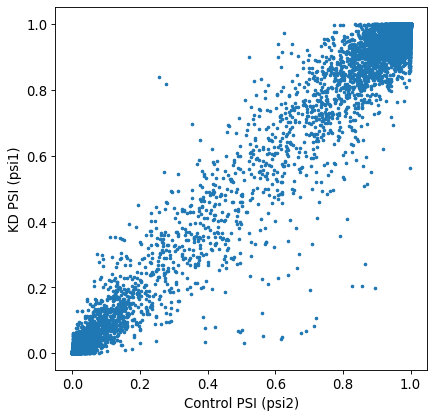

In [ ]:
filter_ind=data.SE.totalreads>50
pyplot.scatter(data.SE.psi2[filter_ind], data.SE.psi1[filter_ind], s=5)
pyplot.xlabel('Control PSI (psi2)')
pyplot.ylabel('KD PSI (psi1)')

The FDR-adjusted pvalue associated with each splicing event is stored in `.fdr`, so we can highlight which events were called by rMATS as significant.

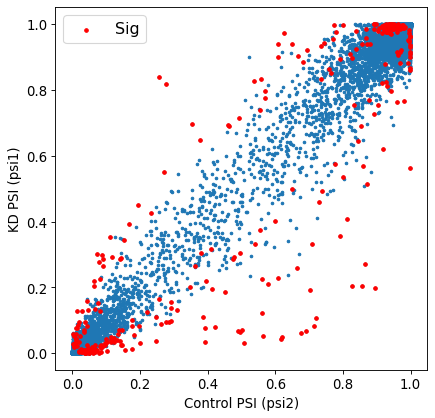

In [ ]:
sig=data.SE.fdr<.1
filter_ind=data.SE.totalreads>50

pyplot.scatter(data.SE.psi2[filter_ind], data.SE.psi1[filter_ind], s=5)
pyplot.scatter(data.SE.psi2[filter_ind & sig ], data.SE.psi1[filter_ind & sig ],c='r', s=10, label='Sig')
pyplot.xlabel('Control PSI (psi2)')
pyplot.ylabel('KD PSI (psi1)')
pyplot.legend()

It would be nice, however, to be able to perform this visualization with needing to throw away a large fraction of the data and without worrying about what that cutoff should be.

### Performing shrinkage on dPSI

A cleaner way of resolving this--which does not require discarding data--is to remove the read count variation from the estimates of the change in PSI. This correction is sometimes called shrinkage and works by using full distribution of parameter estimates along with the uncertainty associated with each estimate to infer the underlying distribution of the true parameter values. The R package `ashr` accomplishes this by modelling the parameter estimates as following a mixture of many distributions, with some fraction of parameters truly equalling zero and others being nonzero. 

Actually performing shrinkage on rMATS deltaPSI requires a bit of statistical gymnastics, as `ashr` requires the standard error associate with each change in inclusion level estimate... which is not provided by rMATS. For details on how rMATS p-values are used to recover the standard error associated with each deltaPSI estimate, see the documentation for `approximate_coefficients`.

All of the necessary acrobatics, however, can be accomplished by calling the `shrink_rMATS` function. This takes either an `rmatsResults` or `rmatsEvents` object and returns a copy where shrinkage has been applied to deltaPSI for all classes of splicing events:

In [ ]:
from spliceformats.shrinkage import shrink_rMATS

corr_data=shrink_rMATS(data)

Shrinkage is applied only to the change in exon-inclusion (specifically the change in the log-odds of exon-inclusion). This is used to reconstruct an estimate of PSI1 based on the corrected estimate of deltaPSI:

Text(0, 0.5, 'KD PSI (psi1)')

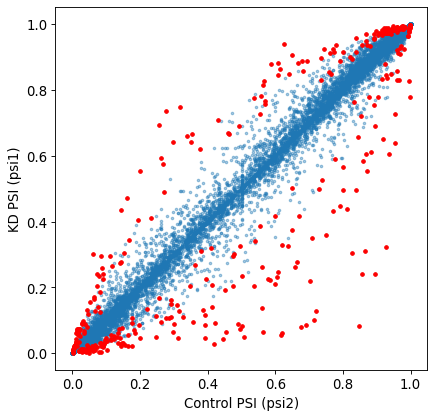

In [ ]:
sig=data.SE.fdr<.1
pyplot.scatter(corr_data.SE.psi2, corr_data.SE.psi1, s=5, alpha=.4)
pyplot.scatter(corr_data.SE.psi2[sig], corr_data.SE.psi1[sig], s=10, c='r', label='sig')
pyplot.xlabel('Control PSI (psi2)')
pyplot.ylabel('KD PSI (psi1)')

The effect of shrinkage is most clearly visualized by again considering the relationship between the deltaPSI estimates and the total read count:

Text(0.5, 0, 'Average IJC + SJC (log10)')

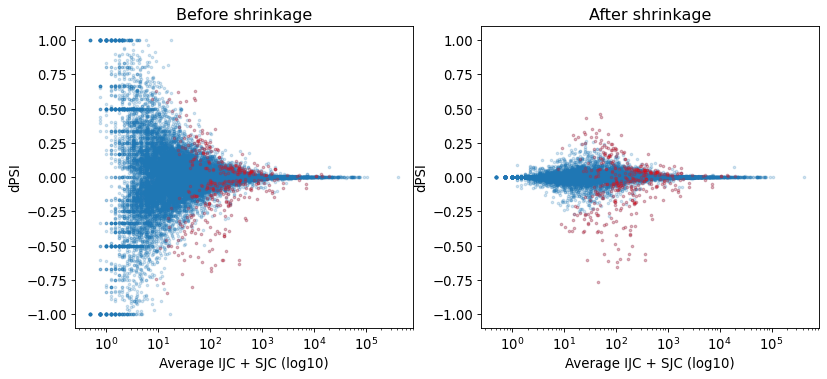

In [ ]:
pyplot.figure(figsize=(12,5))
ax=pyplot.subplot(121,)
pyplot.title('Before shrinkage')
pyplot.scatter(data.SE.orig.totalreads, data.SE.orig.dpsi, s=5, alpha=.2,)
pyplot.scatter(data.SE.orig.totalreads[sig], data.SE.orig.dpsi[sig], c='r', s=5, alpha=.2, label='Sig')
pyplot.xscale('log')
pyplot.ylabel('dPSI')
pyplot.xlabel('Average IJC + SJC (log10)')
pyplot.subplot(122,sharey=ax)
pyplot.title('After shrinkage')
pyplot.scatter(corr_data.SE.totalreads, corr_data.SE.dpsi, s=5,alpha=.2)
pyplot.scatter(corr_data.SE.totalreads[sig], corr_data.SE.dpsi[sig], c='r', s=5, alpha=.2,label='Sig')
pyplot.xscale('log')
pyplot.ylabel('dPSI')
pyplot.xlabel('Average IJC + SJC (log10)')

We can also directly compare how the dPSI estimate differ before and after performing shrinkage

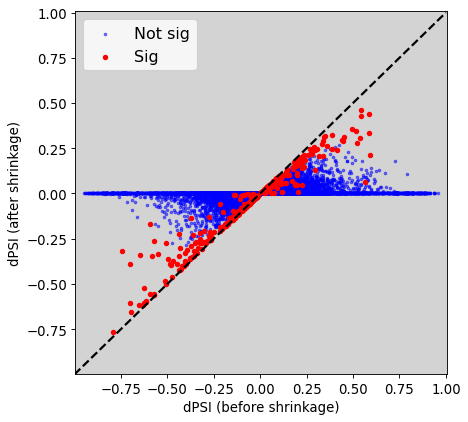

In [ ]:
pyplot.scatter(data.SE.dpsi,corr_data.SE.dpsi, s=5, c='b',alpha=.5, label='Not sig')
pyplot.gca().set_facecolor('lightgrey')
pyplot.scatter(data.SE.dpsi[sig],corr_data.SE.dpsi[sig], s=15,c='r', label='Sig')
pyplot.ylabel('dPSI (after shrinkage)')
pyplot.xlabel('dPSI (before shrinkage)')
pyplot.legend()
pyplot.plot([-1,1],[-1,1], c='black', lw=2, ls='--',)
minval, maxval=numpy.min(data.SE.dpsi), numpy.max(data.SE.dpsi)
xlim=pyplot.xlim(minval-.05,maxval+.05)
ylim=pyplot.ylim(minval-.05,maxval+.05)


It's might also be helpful to plot how much dPSI decreases after shrinkage as a function of the readcounts:

Text(0.5, 0, 'Average read count (IJC+SJC)')

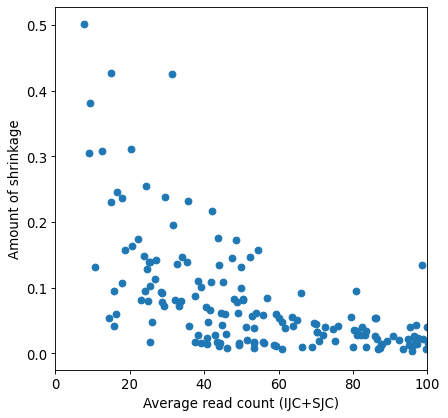

In [ ]:
pyplot.scatter(data.SE.totalreads[sig], numpy.abs(data.SE.dpsi[sig]-corr_data.SE.dpsi[sig]))
pyplot.xlim(0,100)
pyplot.ylabel('Amount of shrinkage')
pyplot.xlabel('Average read count (IJC+SJC)')

### Writing the corrected estimates to output



In [ ]:
corr_data.write2csv('01_outputs/rMATS', outname='corrected')